# Colab set-up

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os
# If the path differs, don't forget to change it
os.chdir("/content/gdrive/MyDrive/DT2219-lab3")

In [ ]:
!ls

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/DT2219-lab3')

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

In [34]:
!pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Imports, etc.

In [1]:
import matplotlib.pyplot as plt
import os
import torch
from os.path import exists

from lab3_tools import *
from lab3_proto import words2phones
from lab1_proto import *
from lab2_tools import *
from lab2_proto import *

# 3) Data

In [2]:
# Get whole dataset from AFS

In [3]:
path2info('tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

('man', 'ae', 'z9z6531', 'a')

In [4]:
loadAudio('tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

(array([11, 13, 11, ...,  9,  9,  9], dtype=int16), 20000)

# 4) Preparing the Data for DNN Training

In [5]:
lab2_models = 'lab2_models_all.npz'
phoneHMMs = np.load(lab2_models, allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]
stateList

['ah_0',
 'ah_1',
 'ah_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'eh_0',
 'eh_1',
 'eh_2',
 'ey_0',
 'ey_1',
 'ey_2',
 'f_0',
 'f_1',
 'f_2',
 'ih_0',
 'ih_1',
 'ih_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'k_0',
 'k_1',
 'k_2',
 'n_0',
 'n_1',
 'n_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'r_0',
 'r_1',
 'r_2',
 's_0',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_2',
 'sp_0',
 't_0',
 't_1',
 't_2',
 'th_0',
 'th_1',
 'th_2',
 'uw_0',
 'uw_1',
 'uw_2',
 'v_0',
 'v_1',
 'v_2',
 'w_0',
 'w_1',
 'w_2',
 'z_0',
 'z_1',
 'z_2']

In [6]:
stateList.index('ay_2')

8

In [7]:
target_class_file_name = "targetClass.txt"
if exists(target_class_file_name):
    print(f"{target_class_file_name} exists, skipping its creation.")
else:
    with open(target_class_file_name, "w") as txt_file:
        for entry in stateList:
            txt_file.write(f"{entry}\n")

targetClass.txt exists, skipping its creation.


In [8]:
# Checking a file content
!cat targetClass.txt

ah_0
ah_1
ah_2
ao_0
ao_1
ao_2
ay_0
ay_1
ay_2
eh_0
eh_1
eh_2
ey_0
ey_1
ey_2
f_0
f_1
f_2
ih_0
ih_1
ih_2
iy_0
iy_1
iy_2
k_0
k_1
k_2
n_0
n_1
n_2
ow_0
ow_1
ow_2
r_0
r_1
r_2
s_0
s_1
s_2
sil_0
sil_1
sil_2
sp_0
t_0
t_1
t_2
th_0
th_1
th_2
uw_0
uw_1
uw_2
v_0
v_1
v_2
w_0
w_1
w_2
z_0
z_1
z_2


## Forced alignment of single sample

In [9]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(filename)
lmfcc = mfcc(samples)

In [10]:
steps = np.load("lab3_example.npz", allow_pickle=True)['example'].item()

In [11]:
np.sum(lmfcc - steps['lmfcc'])

7.61258764359063e-12

In [12]:
wordTrans = list(path2info(filename)[2])
wordTrans

['z', '4', '3']

In [13]:
# Get the phoneme transcription of a sequence of words
from prondict import prondict
phoneTrans = words2phones(wordTrans, prondict)
phoneTrans

['sil',
 'z',
 'iy',
 'r',
 'ow',
 'sp',
 'f',
 'ao',
 'r',
 'sp',
 'th',
 'r',
 'iy',
 'sp',
 'sil']

In [14]:
utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)

In [15]:
# Splitting phonemes (in our case) into three components, execept short pause (sp) which has just one
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
stateTrans

['sil_0',
 'sil_1',
 'sil_2',
 'z_0',
 'z_1',
 'z_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'sp_0',
 'f_0',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'r_0',
 'r_1',
 'r_2',
 'sp_0',
 'th_0',
 'th_1',
 'th_2',
 'r_0',
 'r_1',
 'r_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'sp_0',
 'sil_0',
 'sil_1',
 'sil_2']

In [16]:
obsloglik = log_multivariate_normal_density_diag(
    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
)

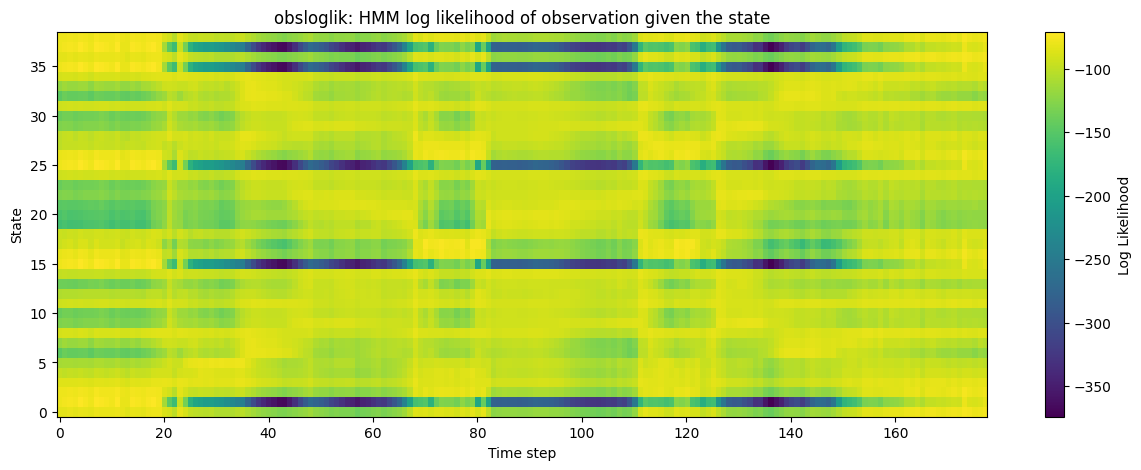

In [17]:
# 5 bars - silence, 3x short silence, silence
# which we expect
plt.figure(figsize=(15, 5))
plt.imshow(obsloglik.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none')
plt.colorbar(label='Log Likelihood')
plt.xlabel('Time step')
plt.ylabel('State')
plt.title('obsloglik: HMM log likelihood of observation given the state')
plt.show()

In [18]:
startprob = utteranceHMM['startprob']
transmat = utteranceHMM['transmat']

viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))

/tmp/ipykernel_9024/687773586.py:4: RuntimeWarning: divide by zero encountered in log
  viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))


In [19]:
logalpha = forward(obsloglik, np.log(startprob), np.log(transmat))

/tmp/ipykernel_9024/582359088.py:1: RuntimeWarning: divide by zero encountered in log
  logalpha = forward(obsloglik, np.log(startprob), np.log(transmat))


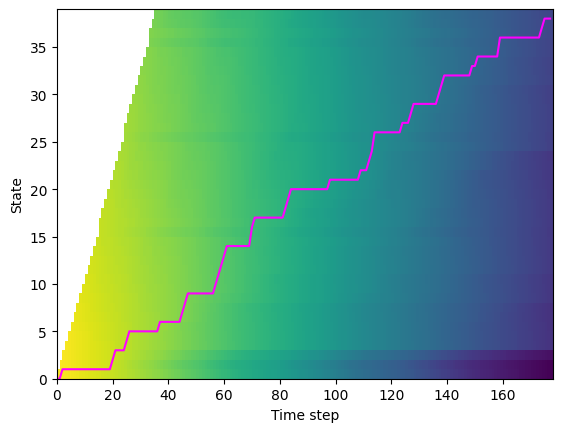

In [20]:
plt.pcolormesh(logalpha.T)
plt.plot(viterbi_path.T, color="magenta")
plt.xlabel('Time step')
plt.ylabel('State')
plt.show()

In [21]:
viterbiStateTrans = [stateTrans[i] for i in viterbi_path]
viterbiStateTrans

['sil_0',
 'sil_0',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_2',
 'z_0',
 'z_0',
 'z_0',
 'z_0',
 'z_1',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'f_0',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',

In [22]:
frames2trans(viterbiStateTrans, outfilename='z43a.lab')

'0 0.02 sil_0\n0.02 0.20000000000000004 sil_1\n0.20000000000000004 0.21000000000000005 sil_2\n0.21000000000000005 0.25000000000000006 z_0\n0.25000000000000006 0.26000000000000006 z_1\n0.26000000000000006 0.37000000000000016 z_2\n0.37000000000000016 0.45000000000000023 iy_0\n0.45000000000000023 0.46000000000000024 iy_1\n0.46000000000000024 0.47000000000000025 iy_2\n0.47000000000000025 0.5700000000000003 r_0\n0.5700000000000003 0.5800000000000003 r_1\n0.5800000000000003 0.5900000000000003 r_2\n0.5900000000000003 0.6000000000000003 ow_0\n0.6000000000000003 0.6100000000000003 ow_1\n0.6100000000000003 0.7000000000000004 ow_2\n0.7000000000000004 0.7100000000000004 f_0\n0.7100000000000004 0.8200000000000005 f_1\n0.8200000000000005 0.8300000000000005 f_2\n0.8300000000000005 0.8400000000000005 ao_0\n0.8400000000000005 0.9800000000000006 ao_1\n0.9800000000000006 1.0900000000000007 ao_2\n1.0900000000000007 1.1200000000000008 r_0\n1.1200000000000008 1.1300000000000008 r_1\n1.1300000000000008 1.140

Is the alignment correct?
- From observering the the time alignment across the two files (original .wav sample above and our .lab file below), we see that the alignment is correct. The audio being played, from the original file, corresponds to the phonemes in the .lab-file.

What can you say observing the alignment between the sound file and the classes?
- The alignment between the audio and the classes ('sil', 'z', 'iy', etc...) are also fine, the pauses (long and short) both work fine.

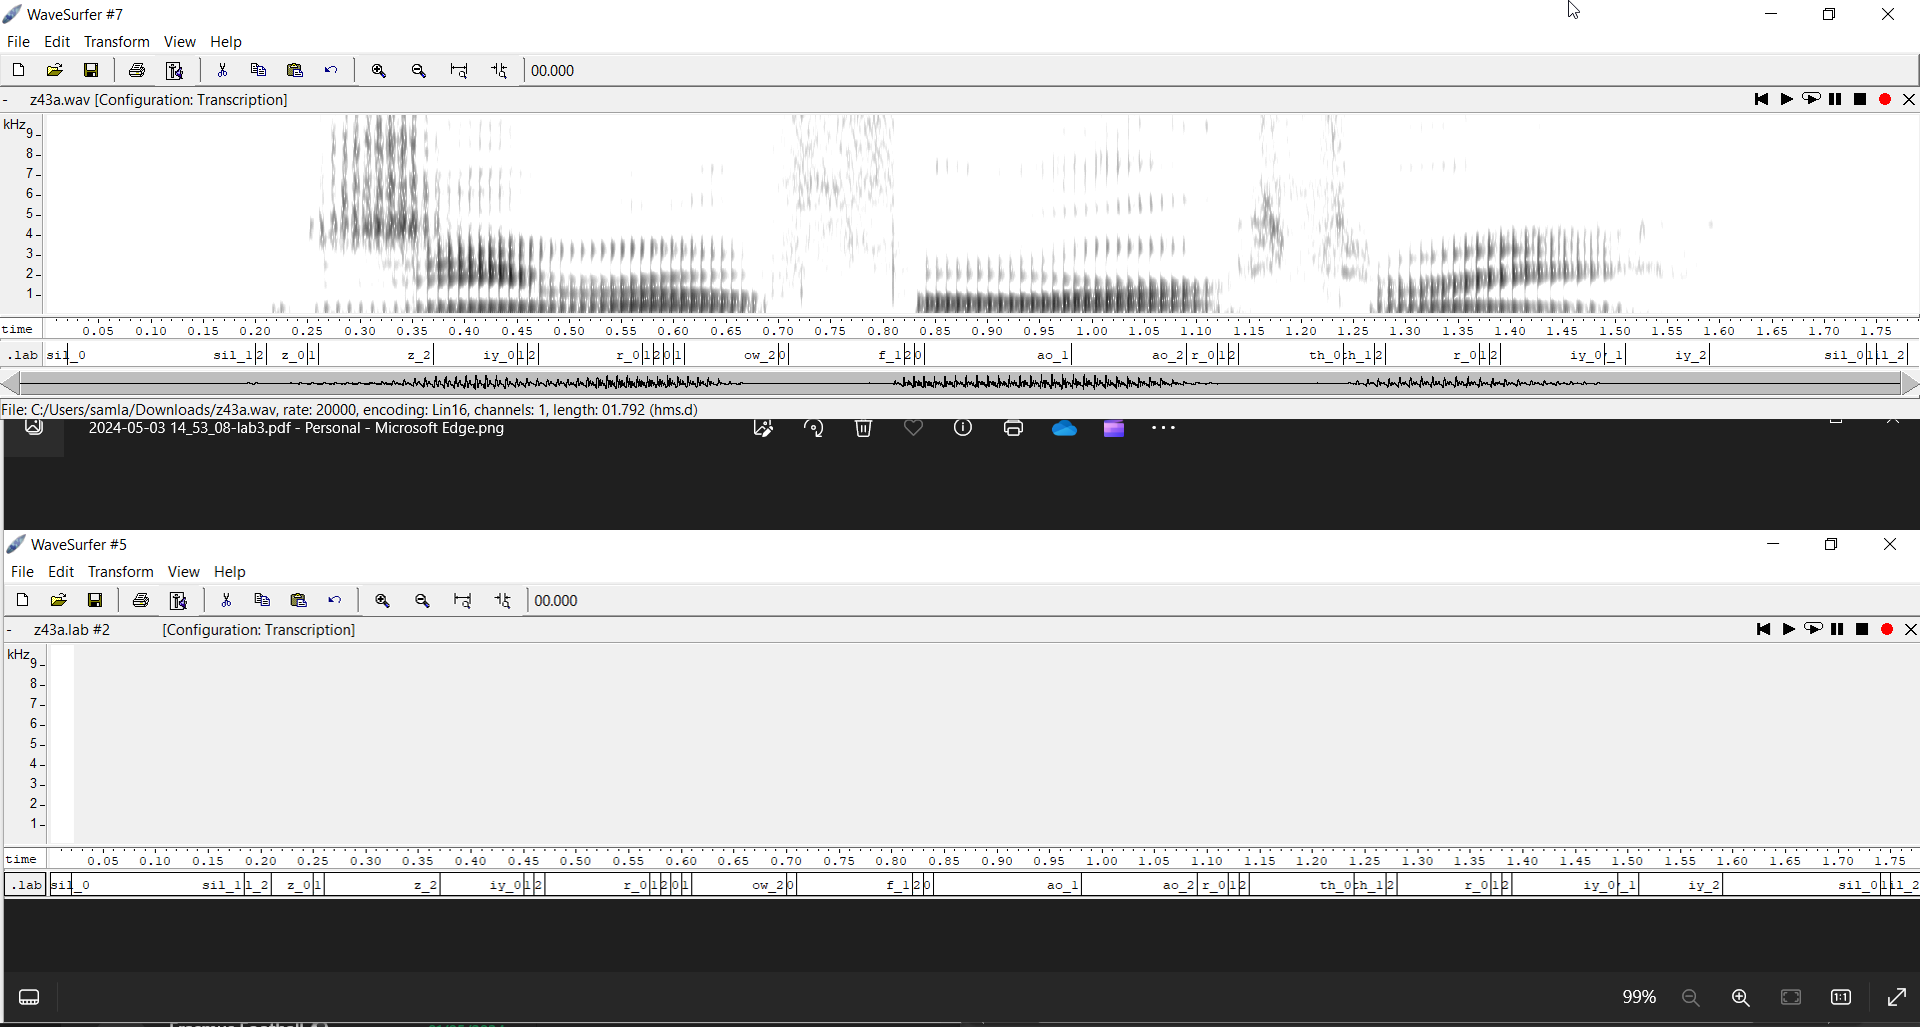

## Feature extraction, forced alignment of datasets

In [23]:
train_file_name = 'traindata.npz'
if exists(train_file_name):
        print(f"{train_file_name} exists, skipping its creation.")
else:
    traindata = []
    for root, dirs, files in os.walk('tidigits/disc_4.1.1/tidigits/train'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)

                # Feature extraction
                lmfcc = mfcc(samples)
                mspec_1 = mspec(samples)

                # Forced alignment
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans, prondict)
                utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
                # Emission likelihoods
                obsloglik = log_multivariate_normal_density_diag(
                    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
                )
                # Viterbi
                startprob = utteranceHMM['startprob']
                transmat = utteranceHMM['transmat']
                viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))
                # Final targets
                targets = [stateList.index(stateTrans[i]) for i in viterbi_path]

                traindata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec_1, 'targets': targets})
    np.savez(train_file_name, traindata=traindata)

traindata.npz exists, skipping its creation.


In [24]:
file_name = 'testdata.npz'
if exists(file_name):
        print(f"{file_name} exists, skipping its creation.")
else:
    testdata = []
    for root, dirs, files in os.walk('tidigits/disc_4.2.1/tidigits/test'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)

                # Feature extraction
                lmfcc = mfcc(samples)
                mspec_1 = mspec(samples)

                # Forced alignment
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans, prondict)
                utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
                # Emission likelihoods
                obsloglik = log_multivariate_normal_density_diag(
                    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
                )
                # Viterbi
                startprob = utteranceHMM['startprob']
                transmat = utteranceHMM['transmat']
                viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))
                # Final targets
                targets = [stateList.index(stateTrans[i]) for i in viterbi_path]

                testdata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec_1, 'targets': targets})
    np.savez(file_name, testdata=testdata)

testdata.npz exists, skipping its creation.


## 4.4 Training and validation sets

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

training_data = np.load(train_file_name, allow_pickle=True)['traindata']

genders = [path2info(training_entry['filename'])[0] for training_entry in training_data]

# TODO: ensure each speaker is in one set only
# We want to generate just a single split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(training_data, genders):
    training_set = np.array([training_data[i] for i in train_index])
    validation_set = np.array([training_data[i] for i in test_index])

# Validate the split size
print("Training set size: ", training_set.shape[0]/training_data.shape[0])
print("Validation set size: ", validation_set.shape[0]/training_data.shape[0])

# Validate the gender distribution
training_set_man_genders = np.sum([path2info(entry['filename'])[0] == 'man' for entry in training_set])
validation_set_man_genders = np.sum([path2info(entry['filename'])[0] == 'man' for entry in validation_set])

print("Training set 'man' ratio: ", training_set_man_genders/training_set.shape[0])
print("Validation set 'man' ratio: ", validation_set_man_genders/validation_set.shape[0])

training_ids = [path2info(entry['filename'])[1] for entry in training_set]
validation_ids = [path2info(entry['filename'])[1] for entry in validation_set]
#np.all([np.isin(training_entry, validation_ids) for training_entry in training_ids])
np.intersect1d(training_ids,validation_ids).shape

Training set size:  0.8999188217557694
Validation set size:  0.10008117824423055
Training set 'man' ratio:  0.4911082474226804
Validation set 'man' ratio:  0.49130938586326767


(112,)

Explain how you selected the two data sets.
- The datasets are selected by using a stratified shuffle split approach from the sklearn.model_selection library, which create random folds made by preserving the percentages - i.e. the distribution - of samples of each class. We are dividing so that 90% of the data is used for training and the remaining 10% is for validation.
- We weren't able to split the datasets in a way so that each speaker is included in a single partition. It might affect the validation performance, but we found the test performance to be okay. This is something we would have liked to have fixed, have we had more time.
- Maybe splitting based on speaker IDs instead of gender and then ensuring the distirbutions between partitions are similar would be an approach.

In [26]:
# Test data
test_set = np.load(file_name, allow_pickle=True)['testdata']

In [27]:
# Create y sets (using targets from sets)
train_y = np.concatenate([entry['targets'] for entry in training_set], axis=0)
val_y = np.concatenate([entry['targets'] for entry in validation_set], axis=0)
test_y = np.concatenate([entry['targets'] for entry in test_set], axis=0)

# Validate the correct order in y
assert np.array_equal(training_set[0]['targets'], train_y[:len(training_set[0]['targets'])])

train_y.shape, val_y.shape, test_y.shape

((1353209,), (154183,), (1527014,))

## 4.5 Acoustic Context (Dynamic Features)

In [28]:
# For each entry in training and validation set
# Go through 'mfcc' and 'mspec' attributes
# Resulting in e.g. lmfcc_i = (lmfcc_i-2, lmfcc_i-1, lmfcc_i, lmfcc_i+1, lmfcc_i+2)
# If i=0, then lmfcc_i = (lmfcc_i+2, lmfcc_i+1, lmfcc_i, lmfcc_i+1, lmfcc_i+2)

def stack_features(dataset, feature='lmfcc', window_size=3):
    full_window_size = 1 + 2 * window_size
    new_dataset = []
    for entry in dataset:
        entry_feature = entry[feature]
        num_timesteps, num_features = entry_feature.shape
        stacked_features = np.zeros((num_timesteps, full_window_size * num_features))

        for t in range(num_timesteps):
            # Go from -3 to +3 feature
            for w in range(-window_size, window_size + 1):
                # If the window goes off the edge of the array, use the edge value.
                if t + w < 0:
                    # Not the same as abs(t+w)
                    value_to_be_assigned = entry_feature[t + abs(w)]
                elif t + w >= num_timesteps:
                    # Complicated, but correct
                    value_to_be_assigned = entry_feature[2*(num_timesteps - 1) - (t+w)] 
                else:
                    value_to_be_assigned = entry_feature[t + w]
                stacked_features[t, (w + window_size) * num_features : (w + window_size + 1) * num_features] = value_to_be_assigned
        new_dataset.append(stacked_features)
    # Can't return as np.array due to different lengths
    return new_dataset

## 4.6  Feature Standardisation

In [29]:
# We standardize over the whole training set

# Input must be flattened _before_ entered into the Scaler if 
from sklearn.preprocessing import StandardScaler

def standardize_datasets(train_x, val_x, test_x):
  scaler = StandardScaler()

  # save the normalisation coefficients
  scaler.fit(train_x)
  # normalise over the whole training set
  d_lmfcc_train_x = scaler.transform(train_x)
  # normalise the validation and test set
  d_lmfcc_val_x = scaler.transform(val_x)
  d_lmfcc_test_x = scaler.transform(test_x)
  return d_lmfcc_train_x, d_lmfcc_val_x, d_lmfcc_test_x

Think about the implications of these different strategies:
1. normalise over the whole training set,

+This approach ensures a consistent scaling and offset for all features across all training samples.

+Ensures that all features contribute equally to the model training, preventing features with larger scales from dominating the learning process.

-Can be less effective if the dataset contains speakers with vastly different vocal characteristics or if the recording conditions vary widely, various voice nuances can be lost.

2. normalise over each speaker separately, or

+Tailors the feature scaling to individual speaker characteristics, potentially improving the model's ability to generalize across different speakers. 

+Useful in datasets with significant inter-speaker variability, as it helps the model focus more on the phonetic content rather than speaker-specific traits. 

-Increases complexity of preprocessing (need to track and apply different normalization parameters)

-Requires many utternaces per speaker to generalize well.

3. normalise each utterance individually.

+Maximizes the effectiveness of the normalization process by adjusting for any variability within individual recordings, such as differences in microphone settings, background noise, or recording levels. 

+Ensures that the dynamic range (=span of audible sound intensities) within each utterance is standardized, potentially helping in situations where recordings are inconsistent. 

-Might overfit to the noise characteristics of individual utterances rather than learning broader, more generalizable patterns.

In the third case, what will happen with the very short utterances in the files containing isolated digits?
- When you normalize super short utterances on their own, you're dealing with a tiny amount of data, which can make your mean and variance calculations rather inconsistent. This kind of normalization might increase the noise and minor quirks in the data, messing up the features more than helping. In turn, this could lead the model to overfit to these quirks, hampering its ability to handle new and different data effectively.

In [30]:
def prepare_x(feature='lmfcc', dynamic=True):
    # Once the features are standardised, for each of the training, validation and test sets, flatten
    # the data structures, that is, concatenate all the feature matrices so that you obtain a single matrix
    # per set that is N × D, where D is the dimension of the features and N is the total number of
    # frames in each of the sets.
    if dynamic:
        train_x = np.concatenate(stack_features(training_set, feature=feature), axis=0)
        val_x = np.concatenate(stack_features(validation_set, feature=feature), axis=0)
        test_x = np.concatenate(stack_features(test_set, feature=feature), axis=0)
    else:
        train_x = np.concatenate([entry[feature] for entry in training_set], axis=0)
        val_x = np.concatenate([entry[feature] for entry in validation_set], axis=0)
        test_x = np.concatenate([entry[feature] for entry in test_set], axis=0)
        # Validate the correct order in x
        assert np.array_equal(training_set[0][feature], train_x[:len(training_set[0][feature])])

    # Printing of expected partition shapes
    print("train_x: ", train_x.shape)
    print("val_x: ", val_x.shape)
    print("test_x: ", test_x.shape)

    s_train_x, s_val_x, s_test_x = standardize_datasets(train_x, val_x, test_x)

    return s_train_x, s_val_x, s_test_x

In [31]:
# target arrays into a one-hot encoding
import torch.nn.functional as F
output_dim = len(stateList)
train_y = F.one_hot(torch.tensor(train_y),num_classes=output_dim)
val_y = F.one_hot(torch.tensor(val_y),num_classes=output_dim)

In [32]:
train_y.shape

torch.Size([1353209, 61])

## 5  Phoneme Recognition with Deep Neural Networks

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
import numpy as np

# Define the neural network architecture
class PhonemeRecognitionModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=256, num_layers=1):
        super(PhonemeRecognitionModel, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(input_size, hidden_size)])
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)])
        self.layers.append(nn.Linear(hidden_size, output_size))
        self.activation = nn.ReLU()  # ReLU activation function, non-linearity

    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = self.activation(layer(x))
        x = self.layers[-1](x)  # Output layer without activation
        return x

Be prepared to explain why you chose the specific activation and what alternatives there are.
- ReLU helps in preventing the vanishing gradient problem and is computationally efficient, which speeds up the training process. There are other options which could have been used, such as Sigmoid, Tanh, Leaky ReLU and ELU, but ReLU seemed to work fine for our intents and purposes.

In [34]:
def train_model(model_file_path, train_x, val_x, train_y, val_y):
    input_size = train_x.shape[1] # Example: number of features - for dynamic MFCCs 91 in our case
    output_size = len(stateList)  # Number of phoneme states
    hidden_size = 256 # Batch size
    num_layers = 2
    
    # Instantiate the model
    model = PhonemeRecognitionModel(input_size, output_size, hidden_size, num_layers)
    
    # Convert data to tensors
    train_x = torch.tensor(train_x.astype(np.float32))
    train_y = train_y.clone().detach()
    val_x = torch.tensor(val_x.astype(np.float32))
    val_y = val_y.clone().detach()
    
    # Create datasets from tensors
    train_dataset = TensorDataset(train_x, train_y)
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_dataset = TensorDataset(val_x, val_y)
    val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
    
    # Define loss and optimizer (CrossEntropyLoss + Adam, for instance)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    
    # setup logging so that you can follow training using TensorBoard (see https://pytorch.org/docs/stable/tensorboard.html)
    writer = SummaryWriter()
    
    # Training and validation loop (from 'pytorch_example.py')
    num_epochs = 3
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
    
            # Convert labels from one-hot to indices if not already done before the loop
            labels_indices = torch.argmax(labels, dim=1) if labels.dim() > 1 else labels
    
            outputs = model(inputs)
            loss = criterion(outputs, labels_indices)  # Use indices, not one-hot labels
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
    
        model.eval()
        val_loss = 0.0
        state_correct = 0
        test_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                # Same label conversion for validation
                labels_indices = torch.argmax(labels, dim=1) if labels.dim() > 1 else labels
                outputs = model(inputs)
                loss = criterion(outputs, labels_indices)
                val_loss += loss.item()
    
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels_indices.size(0)
                state_correct += (predicted == labels_indices).sum().item()
    
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        state_accuracy = 100 * state_correct / test_total
        print(f'Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_accuracy={state_accuracy:.2f}%')
    
    # save the trained network
    torch.save(model, model_file_path)
    return model

Decide the kind of loss criterion most appropriate for classification
- For classification, cross entropy loss tends to be the most appropriate because it measures the difference between the predicted probabilities and the actual class labels. Therefore, this loss is also inherently compatible with the probability (softmax activation) being used in the output layer.

Try to understand and be prepared to explain what happens inside the loop. What is the purpose of the validation data?
- In the training loop, the model is trained to minimize prediction errors and update its weights using the Adam optimizer. The validation data is used to evaluate the model's performance on unseen data, helping to prevent overfitting and ensuring it generalizes well beyond the training set. This allows adjustments based on the model’s ability to perform under new conditions.

### Training

In [35]:
feature='lmfcc'
dynamic=False

train_x, val_x, test_x = prepare_x(feature, dynamic)

# Append to file name
feature = 'd_' + feature if dynamic else feature
model_file_path = f'{feature}_trained-net.pt'

if exists(model_file_path):
    model = torch.load(model_file_path)
else:
    model = train_model(model_file_path, train_x, val_x, train_y, val_y)

train_x:  (1353209, 13)
val_x:  (154183, 13)
test_x:  (1527014, 13)


Note the evolution of the loss function and the accuracy of the model for every epoch. What can you say comparing the results on the training and validation data?
- Seems consistent and fine, the train_loss and val_loss are decreasing, and the accuracy seems to be improving. Moreover, we get lower accuracy for non-dynamic features, which makes sense, as they capture less information.

## 5.1 Detailed Evaluation

In [36]:
from sklearn.metrics import confusion_matrix
from scipy.special import softmax

def calculate_accuracy(predictions, targets):
    return (predictions == targets).mean()

def map_states_to_phonemes(state_predictions, state_to_phoneme_map):
    return np.vectorize(state_to_phoneme_map.get)(state_predictions)

# Assuming the model outputs and the targets are in the following variables
test_x = torch.tensor(test_x.astype(np.float32))
outputs = model(test_x)  # Outputs from the network
predictions = torch.argmax(outputs, dim=1).numpy()
targets = test_y

# 1. Frame-by-frame accuracy at the state level
state_level_accuracy = calculate_accuracy(predictions, targets)
print("State-level Accuracy:", state_level_accuracy)

# Generate state-to-phoneme mapping
state_to_phoneme_map = {i: ph.split('_')[0] for i, ph in enumerate(stateList)}


# 2. Frame-by-frame accuracy at the phoneme level
phoneme_predictions = map_states_to_phonemes(predictions, state_to_phoneme_map)
phoneme_targets = map_states_to_phonemes(targets, state_to_phoneme_map)
phoneme_level_accuracy = calculate_accuracy(phoneme_predictions, phoneme_targets)
print("Phoneme-level Accuracy:", phoneme_level_accuracy)

State-level Accuracy: 0.5677262945853804
Phoneme-level Accuracy: 0.6942902946534871


In [37]:
# 5. Confusion matrices
state_conf_matrix = confusion_matrix(targets, predictions)
phoneme_conf_matrix = confusion_matrix(phoneme_targets, phoneme_predictions)
print("State-level Confusion Matrix:\n", state_conf_matrix)
print("Phoneme-level Confusion Matrix:\n", phoneme_conf_matrix)

State-level Confusion Matrix:
 [[7914  674   32 ...    1    0    1]
 [ 693 5488  531 ...    0    1   13]
 [ 146  779 1810 ...   20    0   11]
 ...
 [   0    2   13 ... 1970  732  605]
 [   0    0    0 ...  740 8141 1245]
 [   1    6    0 ...  334  283 8321]]
Phoneme-level Confusion Matrix:
 [[ 18067     58   8130    532    125     83    486    228      4   8132
    2430    800      1      9      0    137    311   1253   4399    282
      47]
 [   111  31166    482      3      8    725      1      0      0      1
    7325   1802      0      2      0      0      2     14     39   2485
       0]
 [  9952    331  78102    113    998    254    342    138     41    802
    5648   1177      1     21      3     54     82    168   3015    899
       3]
 [   720      0    132   7164    226     47   6876     29   1972    135
     538     52    822     45      0    336    295    156   2338     10
     492]
 [   108      0   1158    417  32821     46   3645   7756    285    859
     307    126     

In [38]:
from sklearn.metrics import classification_report

report = classification_report(phoneme_targets, phoneme_predictions, output_dict=True)
report

{'ah': {'precision': 0.4105110086114835,
  'recall': 0.3969547831436481,
  'f1-score': 0.40361910080982966,
  'support': 45514.0},
 'ao': {'precision': 0.6420948535168322,
  'recall': 0.7056559344291989,
  'f1-score': 0.6723765964791163,
  'support': 44166.0},
 'ay': {'precision': 0.7658560502059227,
  'recall': 0.7646264097744361,
  'f1-score': 0.7652407360232015,
  'support': 102144.0},
 'eh': {'precision': 0.450651066238913,
  'recall': 0.3200357382175564,
  'f1-score': 0.37427511624262055,
  'support': 22385.0},
 'ey': {'precision': 0.61083918036143,
  'recall': 0.6297561256403861,
  'f1-score': 0.6201534275564962,
  'support': 52117.0},
 'f': {'precision': 0.6439402324294411,
  'recall': 0.6906691991995387,
  'f1-score': 0.6664866501378763,
  'support': 58966.0},
 'ih': {'precision': 0.42305493682363843,
  'recall': 0.5345321411670942,
  'f1-score': 0.47230474681455076,
  'support': 40151.0},
 'iy': {'precision': 0.5631587195862555,
  'recall': 0.49117501324175167,
  'f1-score': 0

In [ ]:
from nltk.metrics import edit_distance

def compute_edit_distance(sequence1, sequence2):
    return edit_distance(sequence1, sequence2)

# 3. Edit distance at the state level
state_sequence_pred = [stateList[p] for p in predictions]
state_sequence_true = [stateList[t] for t in targets]
state_edit_distance = compute_edit_distance(state_sequence_pred, state_sequence_true)
print("State-level Edit Distance:", state_edit_distance)

# 4. Edit distance at the phoneme level
phoneme_sequence_pred = [state_to_phoneme_map[p] for p in predictions]
phoneme_sequence_true = [state_to_phoneme_map[t] for t in targets]
phoneme_edit_distance = compute_edit_distance(phoneme_sequence_pred, phoneme_sequence_true)
print("Phoneme-level Edit Distance:", phoneme_edit_distance)

## 5.2 Possible questions

- **What does feature type and context window size affect?**
  - Both describe speech signal, but MFCC in a de-correlated manner (log of Mel-spectrum + DCT). They both affect the size of the input, the MFCCs are smaller than mspecs. The added context window size increase temporal understanding (i.e. time evolution) of speech signal. That is why the dynamic features outperform the non-dynamic.

- **Why do we normalize input features based on the activation functions?**
  - Usually, it is important. But as we use ReLU it is less so, as it is less sensitive to scale of inputs. That being said, normalization makes the training faster and more stable.

- **How does the number of units per layer and the number of layers influence learning?**
  - Both increase the model's ability to learn and understand patterns. The higher the number of units per layer, the better the capacity to understand individual features. The more layers, the better the understanding of complexity of the data.

- **What happens when you switch up activation functions?**
  - You need to understand the consequences of this choice. That is why we use ReLU only. Changing from ReLU might introduce the need to normalize, as per the point above.

- **What's the deal with learning rate and its strategies?**
  - It determines the step size of each iteration. It represents a trade-off between speed and finding a minimum. In case of Adam, one typically starts with a larger one (larger steps), that is during training diminished.

- **Are the network's posteriograms stable over time?**
  - Not sure.

- **How are errors spread across different phonetic classes?**
  - We can evalute this by looking at the confusion matrix. "sp" has by far the worst performance (which is more or less okay, might be classified as "sil" or skipped), followed by "eh".


Plot the posteriors for each class for an example utterance and compare them to the target
values. What properties can you observe?

In [39]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(filename)
lmfcc = mfcc(samples)
test_input = torch.tensor(lmfcc.astype(np.float32))
test_output = model(test_input)  # Outputs from the network
test_output.shape

torch.Size([178, 61])

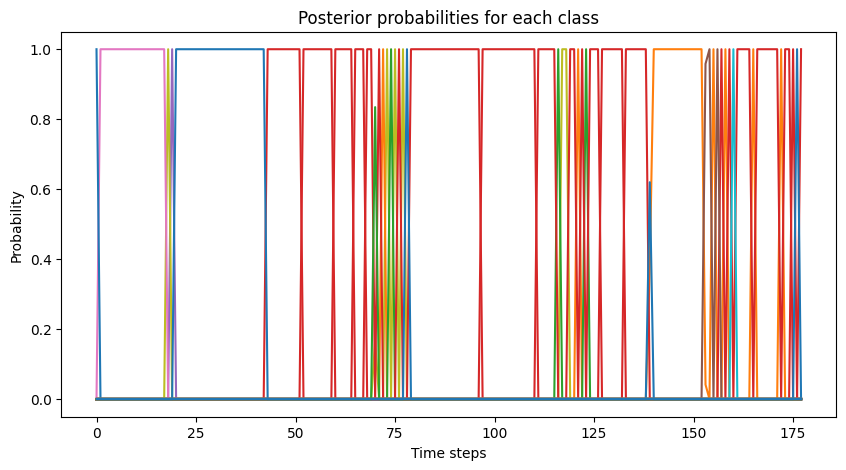

In [40]:
# Convert the output to probabilities
probabilities = torch.nn.functional.softmax(test_output, dim=1).detach().numpy()

# Plot the probabilities
plt.figure(figsize=(10, 5))
plt.plot(probabilities)
plt.title('Posterior probabilities for each class')
plt.xlabel('Time steps')
plt.ylabel('Probability')
plt.show()

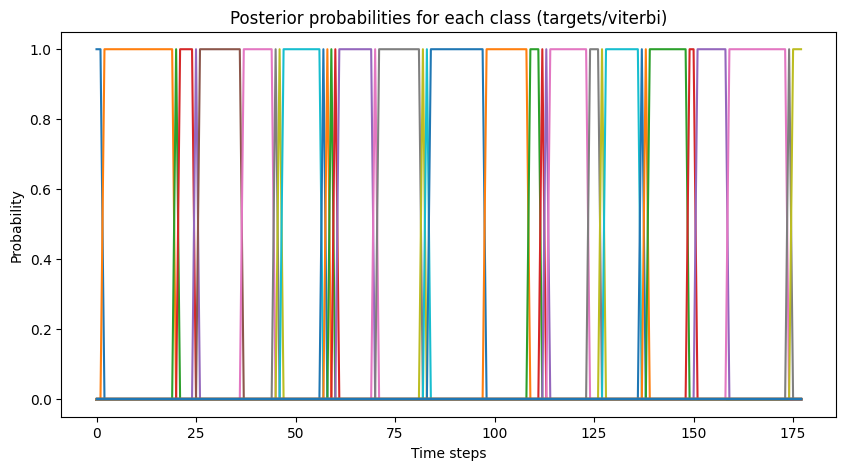

In [41]:
oh_viterbi = F.one_hot(torch.tensor(viterbi_path),num_classes=output_dim)

# Plot the probabilities
plt.figure(figsize=(10, 5))
plt.plot(oh_viterbi)
plt.title('Posterior probabilities for each class (targets/viterbi)')
plt.xlabel('Time steps')
plt.ylabel('Probability')
plt.show()